In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [6]:
from google.colab import files
uploaded = files.upload()


Saving IMDb Movies India.csv to IMDb Movies India (1).csv


In [8]:
df = pd.read_csv("IMDb Movies India.csv", encoding='latin1')

df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [10]:

df.columns = df.columns.str.strip()


df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')


df = df.dropna(subset=['Rating']).copy()


df['Genre'] = df['Genre'].fillna('')
df['Director'] = df['Director'].fillna('')
df['Actor 1'] = df['Actor 1'].fillna('')
df['Actor 2'] = df['Actor 2'].fillna('')
df['Actor 3'] = df['Actor 3'].fillna('')

df.shape

(7919, 10)

In [11]:

df['Actors'] = df['Actor 1'] + ' ' + df['Actor 2'] + ' ' + df['Actor 3']

X = df[['Genre', 'Director', 'Actors']]
y = df['Rating']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
text_features = ['Genre', 'Director', 'Actors']

preprocessor = ColumnTransformer(
    transformers=[
        ('genre', TfidfVectorizer(max_features=500), 'Genre'),
        ('director', TfidfVectorizer(max_features=300), 'Director'),
        ('actors', TfidfVectorizer(max_features=500), 'Actors')
    ]
)


In [14]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])


In [16]:
from sklearn.linear_model import Ridge

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

model.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('genre',
                                                  TfidfVectorizer(max_features=500),
                                                  'Genre'),
                                                 ('director',
                                                  TfidfVectorizer(max_features=300),
                                                  'Director'),
                                                 ('actors',
                                                  TfidfVectorizer(max_features=500),
                                                  'Actors')])),
                ('regressor', Ridge())])

In [17]:
y_pred = model.predict(X_test)

print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


MAE : 0.9345457027141669
MSE : 1.4188478590533686
RMSE: 1.1911540030799412
R2 Score: 0.23682781508763606


In [18]:
new_movie = pd.DataFrame({
    'Genre': ['Action Drama'],
    'Director': ['S. S. Rajamouli'],
    'Actors': ['Prabhas Rana Daggubati Anushka Shetty']
})

predicted_rating = model.predict(new_movie)
print("Predicted Rating:", predicted_rating[0])


Predicted Rating: 5.4449799429008605


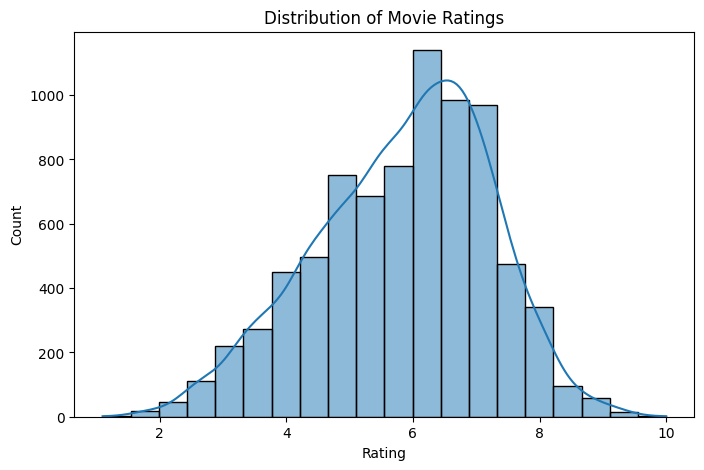

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()
